<a href="https://colab.research.google.com/github/rixprakash/Jarheads/blob/main/Project%201/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/rixprakash/Jarheads

Cloning into 'Jarheads'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 42 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 5.91 MiB | 5.27 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [4]:
import pandas as pd
music = pd.read_csv('/content/Jarheads/Project 1/tcc_ceds_music.csv')

In [5]:
music.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,10713,mariah carey,sent from up above,1990,pop,wanna live imagine look eye surpass paradise h...,77,0.000774,0.000774,0.365018,...,0.000774,0.086322,0.651251,0.642976,0.033433,0.000006,0.758862,0.649639,world/life,0.428571
1,10718,social distortion,drug train,1990,pop,high heavens depths hell friends friends live ...,36,0.087881,0.092390,0.370283,...,0.002024,0.002024,0.483375,0.679461,0.003463,0.008097,0.495054,0.903901,world/life,0.428571
2,10719,new kids on the block,games,1990,pop,game game game game game somebody say somebody...,139,0.000454,0.000454,0.000454,...,0.021312,0.112456,0.753060,0.629285,0.023292,0.000186,0.784625,0.863860,obscene,0.428571
3,10722,social distortion,a place in my heart,1990,pop,today miss smile pleasant memory things life w...,40,0.001548,0.001548,0.375639,...,0.346398,0.108699,0.415141,0.674615,0.005340,0.010830,0.338417,0.990991,world/life,0.428571
4,10723,whitney houston,lover for life,1990,pop,realize baby mean cover love shelter need lift...,64,0.023219,0.001120,0.379568,...,0.032134,0.001120,0.711903,0.627259,0.641566,0.000000,0.654782,0.533519,world/life,0.428571


In [8]:
music.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

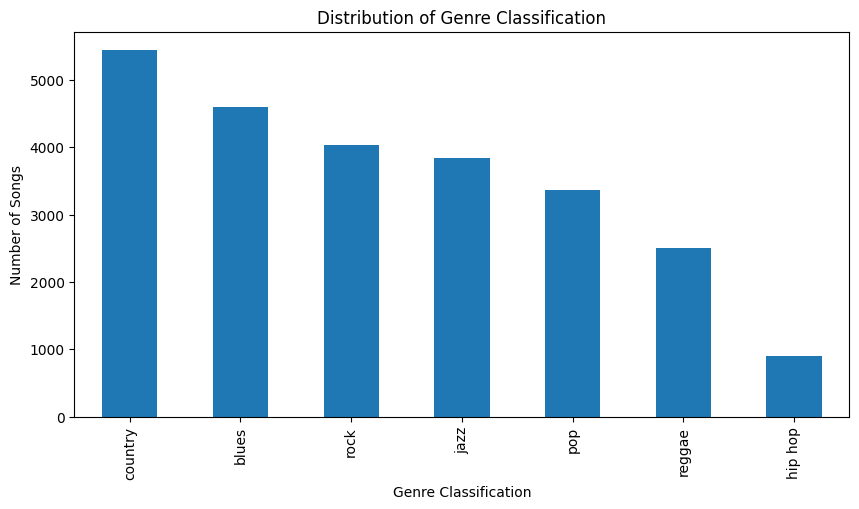

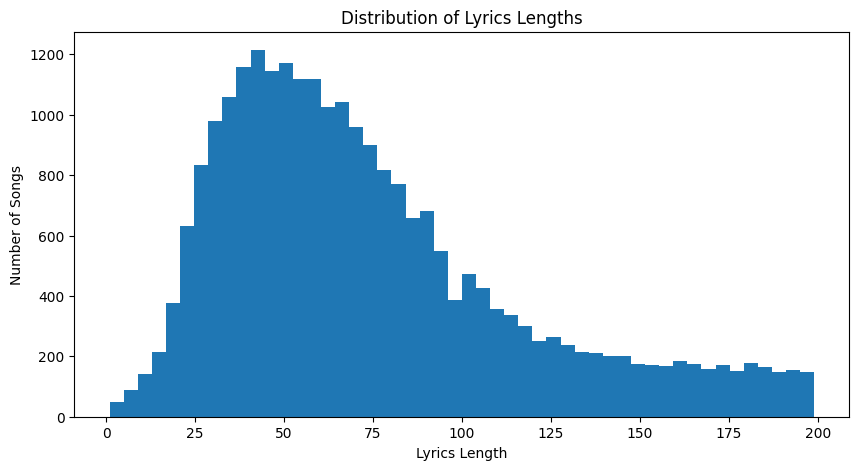

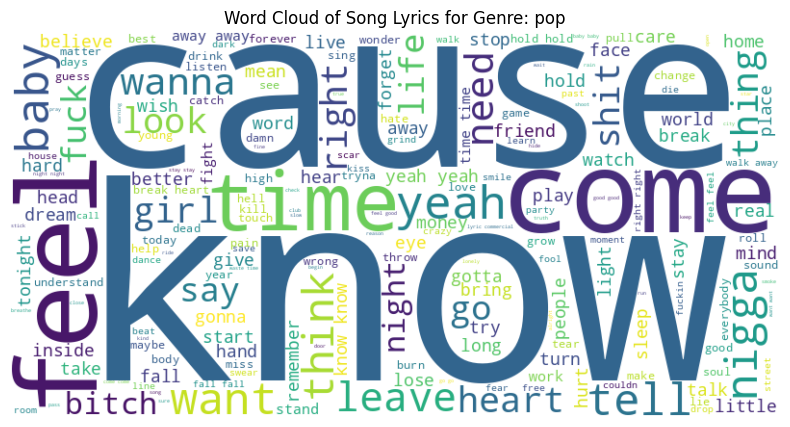

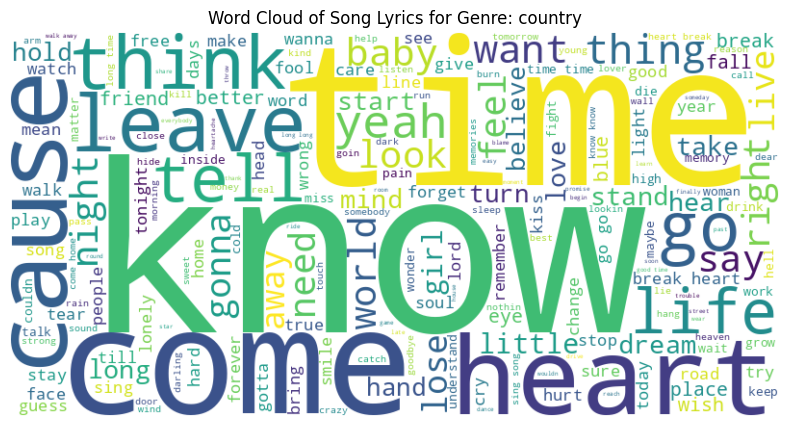

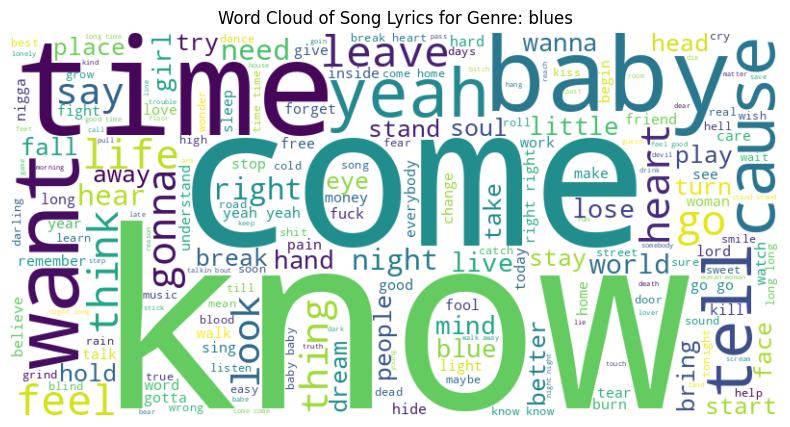

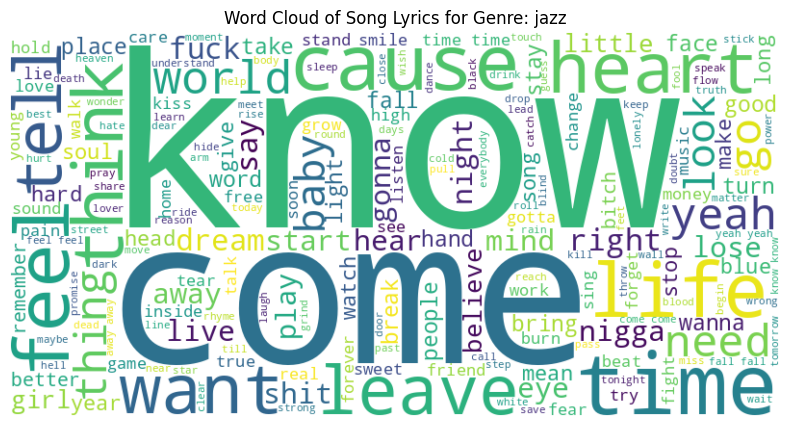

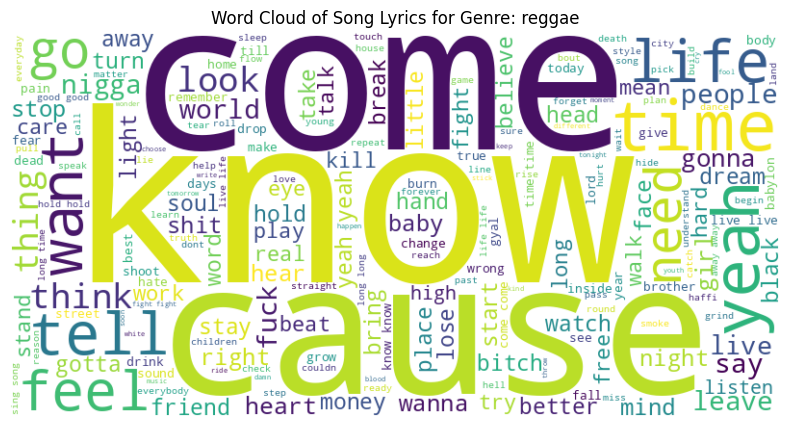

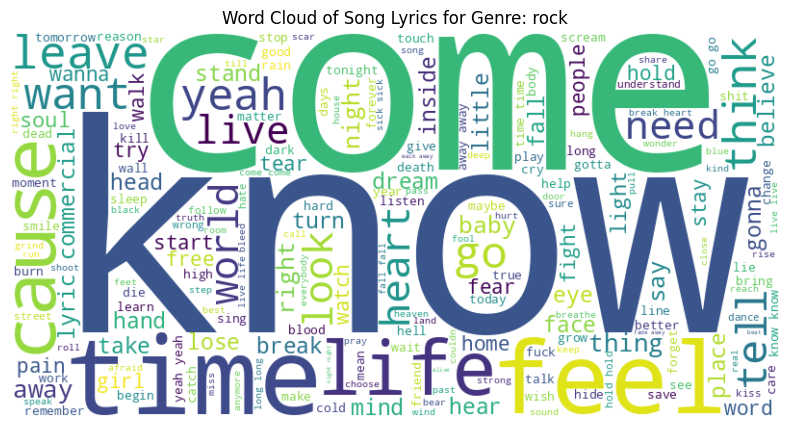

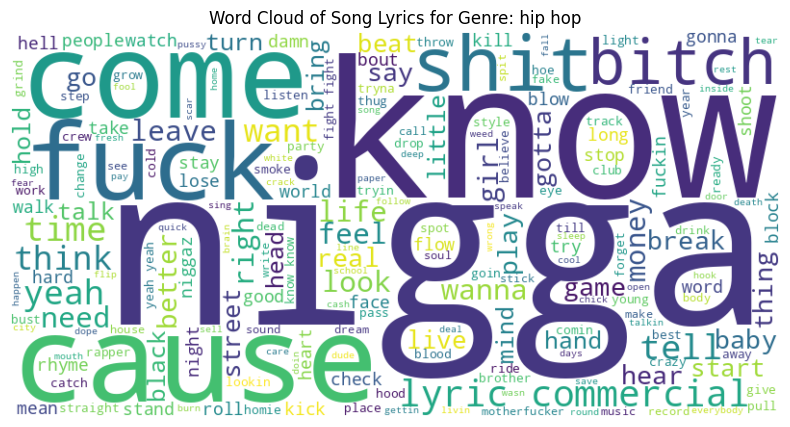

In [17]:
import matplotlib.pyplot as plt

music['lyrics'].fillna('', inplace=True)  # Replace NaN with empty strings

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Genre Distribution
genre_counts = music['genre'].value_counts()
plt.figure(figsize=(10, 5))
topic_counts.plot(kind='bar')
plt.xlabel("Genre Classification")
plt.ylabel("Number of Songs")
plt.title("Distribution of Genre Classification")
plt.show()

# Lyrics Length Distribution
lyrics_lengths = music['len']
plt.figure(figsize=(10,5))
plt.hist(lyrics_lengths, bins=50)
plt.xlabel("Lyrics Length")
plt.ylabel("Number of Songs")
plt.title("Distribution of Lyrics Lengths")
plt.show()

# Word Cloud by Genre
for genre in music['genre'].unique():
    subset = music[music['genre'] == genre]
    text = ' '.join(subset['lyrics'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of Song Lyrics for Genre: {genre}")
    plt.show()